The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [135]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

In [ ]:
# Read the dataset
data = pd.read_csv('/content/car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [ ]:
# Find the rows and columns in the dataset
data.shape

(112, 2)

In [ ]:
# Find the information from this dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
# Find the missing values from each column of this dataset
data.isna().sum()

Year     0
Price    0
dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

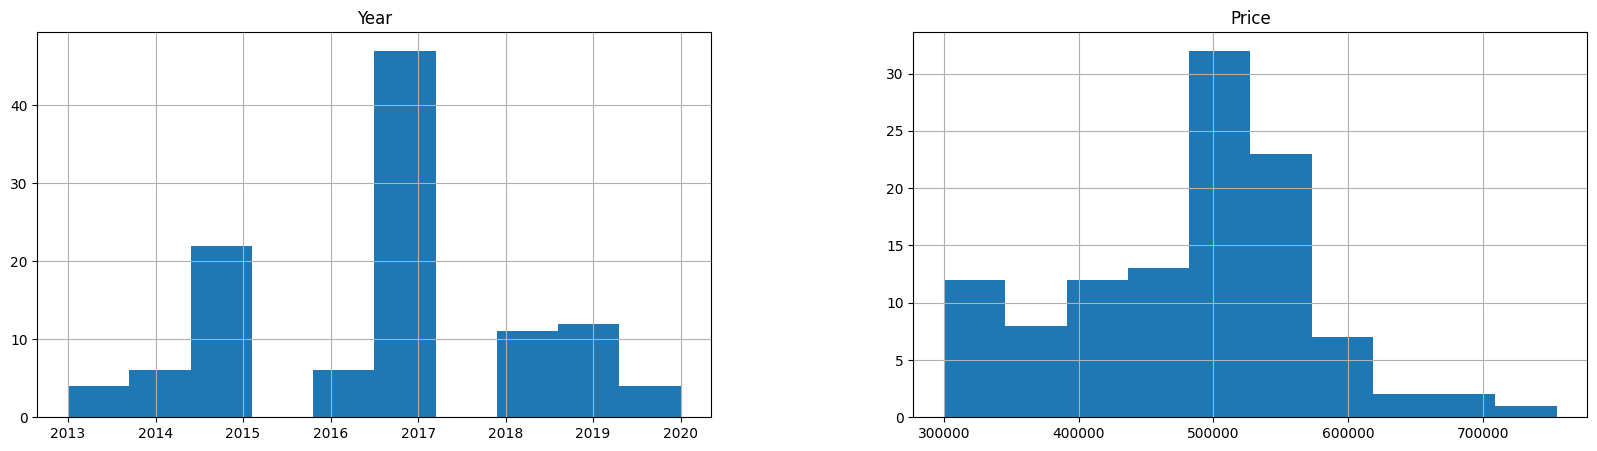

In [ ]:
# Find the graphs for Year and Price
freqgraph = data.select_dtypes(include = 'int64')
freqgraph.hist(figsize = (20, 5))

Text(0.5, 1.0, 'Boxplot with Outliers')

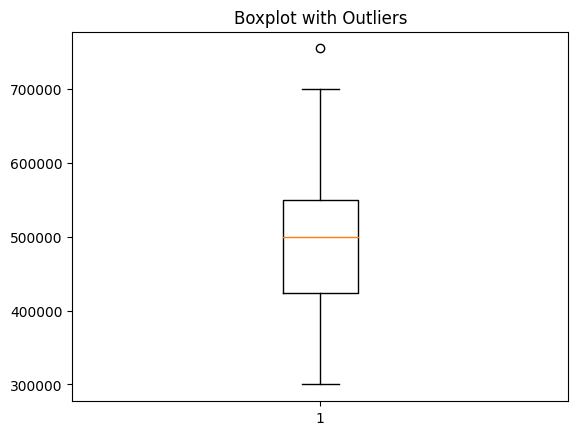

In [ ]:
# Handling the outliers
plt.figure()
plt.boxplot(data['Price'])
plt.title('Boxplot with Outliers')

In [ ]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data['Price'] = data['Price'].clip(lower = lower_bound, upper = upper_bound)

Text(0.5, 1.0, 'Boxplot without Outliers')

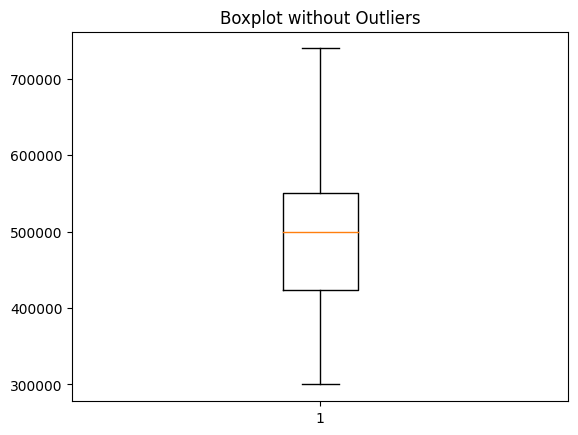

In [ ]:
plt.boxplot(data['Price'])
plt.title('Boxplot without Outliers')

<Axes: >

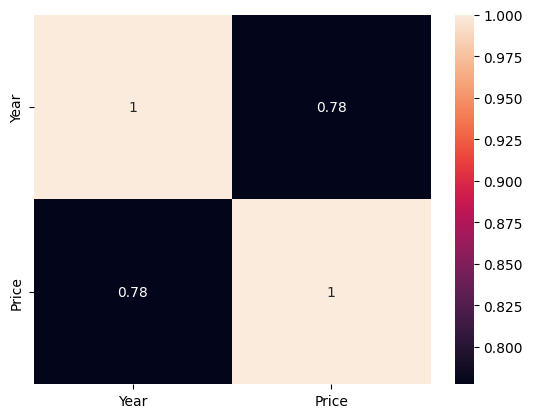

In [ ]:
# Find the correlation of this dataset using a heatmap
sns.heatmap(data.corr(),annot=True)

In [140]:
# Split the data in to training and testing sets

X = data[['Year']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

In [141]:
# For Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_predict = lin_reg.predict(X_test)
r2_lin_reg = r2_score(y_test,lin_reg_predict)

In [142]:
# For Lasso Regression Model
lasso_reg = Lasso(alpha=.01)
lasso_reg.fit(X_train, y_train)
lasso_reg_predict = lasso_reg.predict(X_test)
r2_lasso_reg = r2_score(y_test,lasso_reg_predict)

In [144]:
print('R2 Score of Linear Regression: ',r2_lin_reg)
print('R2 Score of Lasso Regression: ',r2_lasso_reg)

R2 Score of Linear Regression:  0.4380956804935515
R2 Score of Lasso Regression:  0.43809572532807695


In [149]:
if r2_lin_reg > r2_lasso_reg:
  print('Linear Regression is a good model')
else:
  print('Lasso Regression is a good model')

Lasso Regression is a good model


In [154]:
# Prediction of a 2022 model of second hand Hyundai Grand i10
input_array = np.array([[2022]])
linear_reg_2022 = lin_reg.predict(input_array)
lasso_reg_2022 = lasso_reg.predict(input_array)

print('Predicted Price of 2022 model in Linear Regression: ',linear_reg_2022)
print('Predicted Price of 2022 model in Lasso Regression: ',lasso_reg_2022)

Predicted Price of 2022 model in Linear Regression:  [739002.05714287]
Predicted Price of 2022 model in Lasso Regression:  [739002.03551911]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


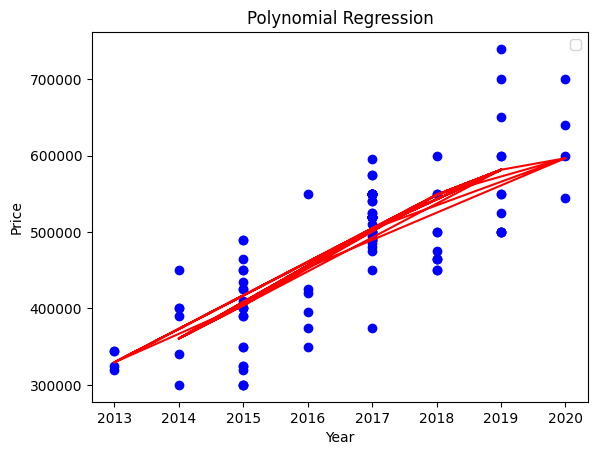

In [156]:
# Linear Relationship between Year and Price
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)

plt.scatter(X, y, color='blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

plt.show()